<a href="https://colab.research.google.com/github/GKS07/NLP-Projects/blob/main/Fake_News_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Classifier

**Using Kaggle API to download the data**

In [ ]:
# installing the kaggle API
! pip install -q kaggle

In [ ]:
# importing the kaggle Json File.
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gau7rav","key":"50c43821a9373319816f6b8412be5c26"}'}

In [ ]:
#making the Kaggle Directopry and copying the kaggle jason file.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
#changing the permission.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# list of data set in kaggle
! kaggle datasets list

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          11390        453  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           3480        133  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            729         29  1.0              
joebeachcapital/top-500-hollywood-m

In [ ]:
#Downloading the fake news data from kaggle.
!kaggle competitions download -c fake-news

 71% 33.0M/46.5M [00:00<00:00, 128MB/s]
100% 46.5M/46.5M [00:00<00:00, 150MB/s]


In [ ]:
# making the directory
! mkdir Kaggle_fake_news_data

In [ ]:
# unzipping the file.
! unzip fake-news.zip -d Kaggle_fake_news_data

Archive:  fake-news.zip
  inflating: Kaggle_fake_news_data/submit.csv  
  inflating: Kaggle_fake_news_data/test.csv  
  inflating: Kaggle_fake_news_data/train.csv  


In [ ]:
# importing the train and test csv files.
import pandas as pd

fake_news_train = pd.read_csv("/content/Kaggle_fake_news_data/train.csv")
fake_news_test =  pd.read_csv("/content/Kaggle_fake_news_data/test.csv")

**Data Discription**

train.csv: A full training dataset with the following attributes:

id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete


label: a label that marks the article as potentially unreliable

1: unreliable

0: reliable

In [ ]:
fake_news_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#preprocessing the data.
fake_news_train.isnull()

,id,title,author,text,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
20795,False,False,False,False,False
20796,False,False,False,False,False
20797,False,False,False,False,False
20798,False,False,False,False,False


In [ ]:
fake_news_train = fake_news_train.dropna()

In [ ]:
fake_news_train.shape

(18285, 5)

In [ ]:
fake_news_train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
# resetting the index

fake_news_train = fake_news_train.reset_index()

In [ ]:
fake_news_train.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
fake_news_train["text"][3]

'Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilians are being killed by American airstrikes in Afghanistan is now higher than it was in 2014 when the US was engaged in active combat operations.   Photo of Hellfire missiles being loaded onto a US military Reaper drone in Afghanistan by Staff Sgt. Brian Ferguson/U.S. Air Force. \nThe Bureau has been able to identify 15 civilians killed in a single US drone strike in Afghanistan last month – the biggest loss of civilian life in one strike since the attack on the Medecins Sans Frontieres hospital (MSF) last October. \nThe US claimed it had conducted a “counter-terrorism” strike against Islamic State (IS) fighters when it hit Nangarhar province with missiles on September 28. But the next day the United Nations issued an unusually rapid and strong statement saying the strike had killed 15 civilians and injured 13 others who had gathered at a house to celebrate a tribal elder’s return from a pil

In [ ]:
fake_news_train["label"][3]

1

In [ ]:
# preprocessing the text data.

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(fake_news_train)):
    review = re.sub('[^a-zA-Z]', ' ', fake_news_train['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [ ]:
# tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
train_news = tfidf.fit_transform(corpus).toarray()

In [ ]:
train_news.shape

(18285, 5000)

In [ ]:
train_label = fake_news_train["label"]

In [ ]:
# splitting the data into trin test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_news, train_label, test_size=0.33, random_state=0)

# Classifier Algorithms

In [ ]:
# creating the  diffrent models to see which one performs better

# MultinomialNB algorithm
from sklearn.naive_bayes import MultinomialNB
classifierNB = MultinomialNB()

# Passiveaggresive algorithm
from sklearn.linear_model import PassiveAggressiveClassifier
classifierPA = PassiveAggressiveClassifier(max_iter = 50)



In [ ]:
from sklearn import metrics
import numpy as np
import itertools

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.900
Confusion matrix, without normalization


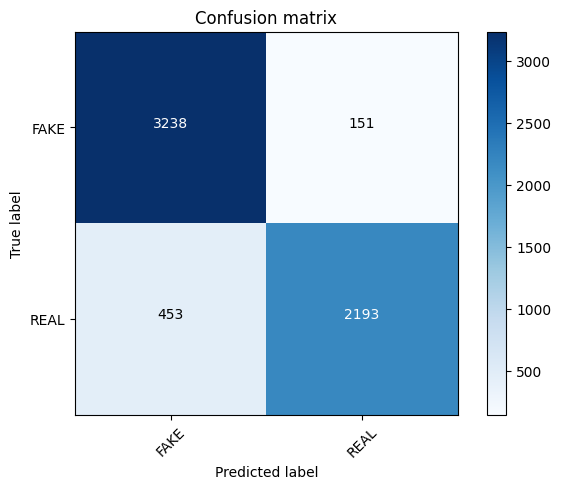

In [45]:
# fitting and predicting on MultinomialNB:

classifierNB.fit(x_train, y_train)
pred = classifierNB.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.950
Confusion matrix, without normalization


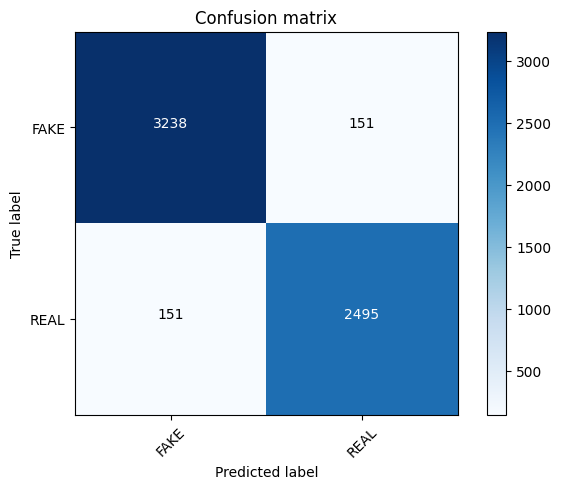

In [46]:
# fitting and predicting on PassiveAggressive Classifier:

classifierPA.fit(x_train, y_train)
pred = classifierPA.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Preprocessing the dataframe and text data**

In [ ]:
# handling the null values and reseting the index

def null_reset(dataframe):
  dataframe = dataframe.dropna()
  dataframe = dataframe.reset_index()
  dataframe = dataframe.drop(["index"], axis = 1)
  return dataframe

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [ ]:
# preprocessing the text data

def preprocess_text(df):
  ps = PorterStemmer()
  corpus = []
  for i in range(0, len(df)):
      review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
      review = review.lower()
      review = review.split()

      review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
      review = ' '.join(review)
      corpus.append(review)
      return corpus

In [ ]:
# tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vec(data_to_vector):
  tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
  vectorized_data = tfidf.fit_transform(data_to_vector).toarray()
  return vectorized_data


In [ ]:
fake_news_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
fake_news_test.shape

(5200, 4)

In [ ]:
# preprocessing the test data

#fake_news_test = null_reset(fake_news_test)

#procesessed_data = preprocess_text(fake_news_test)

#test_news = tfidf_vec(procesessed_data)

#test_label = fake_news_test["label"]

In [49]:
#sub = pd.read_csv("/content/Kaggle_fake_news_data/submit.csv")

In [ ]:
#sub.head()

In [ ]:
#sub.shape